<a href="https://colab.research.google.com/github/priyankconnect/MyProjects/blob/main/Regular_Expressions/All_About_Regular_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import re module

In [ ]:
import re

Just click help to get a help in this module

In [ ]:
help(re)

Help on module re:

NAME
    re - Support for regular expressions (RE).

MODULE REFERENCE
    https://docs.python.org/3.7/library/re
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides regular expression matching operations similar to
    those found in Perl.  It supports both 8-bit and Unicode strings; both
    the pattern and the strings being processed can contain null bytes and
    characters outside the US ASCII range.
    
    Regular expressions can contain both special and ordinary characters.
    Most ordinary characters, like "A", "a", or "0", are the simplest
    regular expressions; they simply match themselves.  You can
    concatenate ordinary characters, so last mat

You can also use dir function

In [ ]:
dir(re)

['A',
 'ASCII',
 'DEBUG',
 'DOTALL',
 'I',
 'IGNORECASE',
 'L',
 'LOCALE',
 'M',
 'MULTILINE',
 'Match',
 'Pattern',
 'RegexFlag',
 'S',
 'Scanner',
 'T',
 'TEMPLATE',
 'U',
 'UNICODE',
 'VERBOSE',
 'X',
 '_MAXCACHE',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_cache',
 '_compile',
 '_compile_repl',
 '_expand',
 '_locale',
 '_pickle',
 '_special_chars_map',
 '_subx',
 'compile',
 'copyreg',
 'enum',
 'error',
 'escape',
 'findall',
 'finditer',
 'fullmatch',
 'functools',
 'match',
 'purge',
 'search',
 'split',
 'sre_compile',
 'sre_parse',
 'sub',
 'subn',
 'template']

Raw Strings

Lets first understand the meaning of back slash in regular strings
Some famous back slash characters are
\n for the new line,

\t for the tab,

\u for the unicode

If we write like this


In [ ]:
#path = "C:\Users\PR_Jul_2018_Sar.xlsx"

We have a syntax error because of the backslash U character over here, so python has interpreted this combination of \U as a special character.

We can solve this issue by turning the regular string into a raw string. Just prepend the string with a lowercase r

In [ ]:
path = r"C:\Users\PR_Jul_2018_Sar.xlsx"

This time no syntax error is being raised

The same issue happens if it finds \t or \new eg. Python thinks that it is the tab or new line.

In order to avoid this we are always prepend our regular expressions with the letter r.

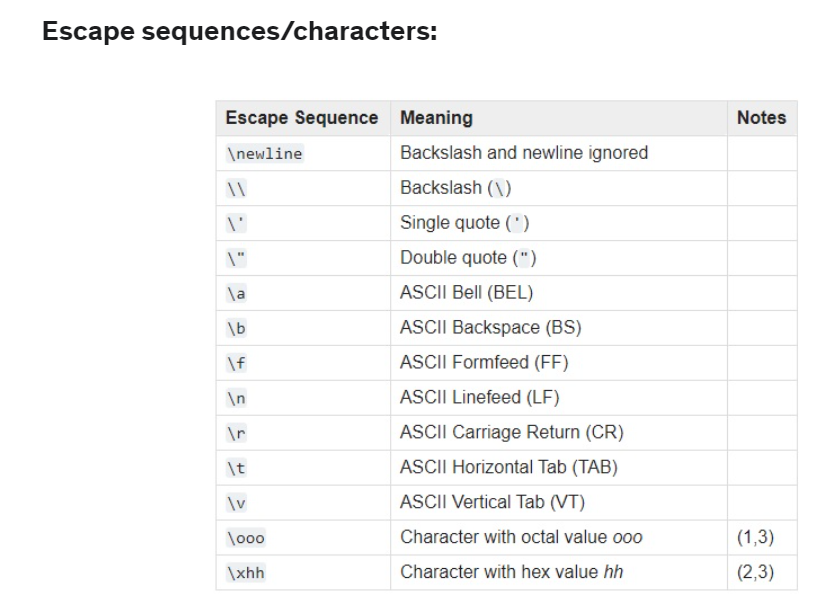

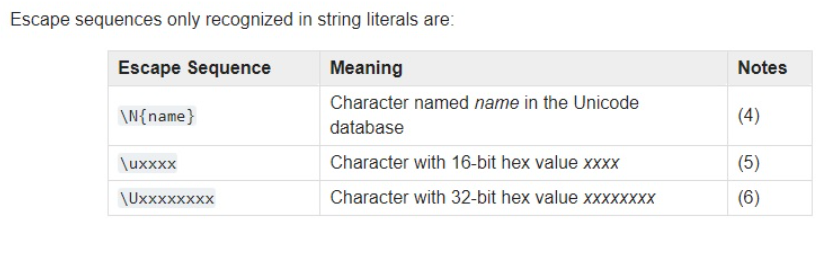

The first method we'll learn is re.compile() method. This method simply compiles the regular expression pattern provided as a string into a regular expression object which can then be handled using various other methods such as match or search.

Notice that I have used r to prepend the regular expression pattern in order to classify this string as the raw string.

\d is called a special sequence and it will match a digit, any digit from 0 to 9 in a target string. The 4 inside curly braces means that the preceding pattern  -in this case a digit- has to occur exactly four times in a row. This means we are matching any number such as 1234, 3416 etc.

In [ ]:
s = r"\d{4}"

The above string r"\d{4}" is just a string, you can verify this using the type function

In [ ]:
type(s)

str

Now lets use the compile method to turn this string into a regular expression object, that we can work with.

In [ ]:
t = re.compile(s)

Lets check the type of t

In [ ]:
type(t)

re.Pattern

This allows us to further work with this object using regular expressions. The compile method is useful when you want to search for the same pattern over and over again, perhaps in different target strings. You are actually compiling the regular expressions once at the beginning, and then use another method such as the findall method, to look for occurrences of the same pattern inside various target strings eg.

Lets say our target string is as given below:

In [ ]:

string = "The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February."

Lets look at findall method to look for any four digit numbers inside the string.

In [ ]:
result = re.findall(t,string)
result

['1998']

This object t can be used for searching four consecutive digits in other target strings as well. However for methods such as search(), match() or findall(), you don't need to compile. as compiling and operations are done at the same time.

So compile first if you want to use the search string again and again.

Lets Look at the search Method.

So we write re.search().

And inside the () we have our regular expressions, we call it pattern.

then , and then string, which is a variable referencing our target string.

And finally we have flags, which is optional. By default no flags are applied

so we have re.search(pattern, string, flags)

So search method looks inside the entire target string and looks occurrences of the pattern that we specifiy as the first argument.

So lets do this.

Here we are searching for three consecutive digits in the target string



In [ ]:
result = re.search(r"\d{3}",string)
result

<re.Match object; span=(15, 18), match='600'>

1.   First the result returned by the object is the match object



In [ ]:
type(result)

re.Match

2. The search method only returns the first occurrence of the pattern in the target string.

Though there are three occurrences, but search method only finds the first and then stops its execution

So going to span(15,18), notice that there are two numbers in the tuple.

The first number (15) is the index at which the first group of three consecutive groups has been located.

The second number (18) is the index of the first character following the match.

Think of this as a string slice

Actually if we use these indexes for slicing the target string, we should obtain 600, so lets try this


In [ ]:
string[15:18]

'600'

You see

After the span variable we have the match itself 600.

On the other hand if the search method doesnt find a match, then it will return None.

Lets assume that we are searching for groups of 10 consecutive integers

In [ ]:
result = re.search(r"\d{10}",string)
result

The search method doesnt return anything as there was no match.

Let us check the type of result

In [ ]:
type(result)

NoneType

We get a none type instead of re.match.

Lets see the re.match() method

the match method returns a match object if and only if the pattern is located at the beginning of the string- so starting with the first character of the string, otherwise it will return none.

Lets check with our string. Our string starts with the word 'The'.

So using 'match', lets try to scan for this pattern at the beginning of the string and lets see the result.

Now the word The is a three letter word, so regular expression should be similar to the one used in previous video, only that this time we are not searching for digits but letters.



In [ ]:
result = re.match(r"\w{3}",string)
result

<re.Match object; span=(0, 3), match='The'>

\w is used for the words.

It doesn't match whitespaces

It rep any alphanumeric letter A-Za-z0-9_

Lets assume that we are looking for a four letter word at the beginning of the string

In [ ]:
result = re.match("r\w{4}",string)
result

Nothing is returned.



In [ ]:
type(result)

NoneType

Lets study the fullmatch() method.

Unlike match which performs the pattern matching only at the beginning of the string, the fullmatch() method returns a match object only if the pattern matches the **entire** target string.

Lets first check the length of the target string

In [ ]:
len(string)

285

So we have 285 characters in total

In [ ]:
result = re.fullmatch(r'.{285}',string)
result

<re.Match object; span=(0, 285), match='The Euro STOXX 600 index, which tracks all stock >

First notice the . in .{285}. In regex syntex, the dot matches any character except the new line character (\n)

So .{285} basically says I want to match a string of 285 characters

Lets look at the result. Match object means the match pefromed successfully. If the target string had multiple lines, the match would have failed.

There is a solution for this as well, that means using a special optional flag that includes the new line character, in the set of characters covered by the dot.

Lets try \w

In [ ]:
result = re.fullmatch(r"\w{285}",string)
result

It it None

In [ ]:
type(result)

NoneType

So the match failed because of whitespaces

One of the most frequently methods in re module is definitely the findall() methods.

The findall() method searches and returns all the matches that are found inside the target string according to the regular expression pattern.

Using this method, the target string is scanned from left to right and the matches are returned in the order they are found as a list of string.

In [ ]:
 result= re.findall(r'\d{3}',string)
 result

['600', '199', '600']

So it found all the three digits.

The result is of type list

In [ ]:
type(result)

list

If no such pattern is found, the result is an empty list

In [ ]:
result = re.findall(r"\d{5}",string)
result

[]

You can see the result is an empty list.

**re.split() method**

Lets think the default split method in python, which is specific to strings.

The default split method splits the string by a certain delimiter.

This delimiter is a fixed string that you define inside the paranthesis.

So lets consider our target string once again. We can use the default split method to split the string using the whitespace as a delimiter.

This means that the result is going to be a list of all the words in the string that were previously separated by a whitespace.

In [ ]:
string.split(" ")

['The',
 'Euro',
 'STOXX',
 '600',
 'index,',
 'which',
 'tracks',
 'all',
 'stock',
 'markets',
 'across',
 'Europe',
 'including',
 'the',
 'FTSE,',
 'fell',
 'by',
 '11.48%',
 '–',
 'the',
 'worst',
 'day',
 'since',
 'it',
 'launched',
 'in',
 '1998.',
 'The',
 'panic',
 'selling',
 'prompted',
 'by',
 'the',
 'coronavirus',
 'has',
 'wiped',
 '£2.7tn',
 'off',
 'the',
 'value',
 'of',
 'STOXX',
 '600',
 'shares',
 'since',
 'its',
 'all-time',
 'peak',
 'on',
 '19',
 'February.']

We can achieve the similar result from split method in the re module.

In [ ]:
result = re.split(r"\s",string)
result

['The',
 'Euro',
 'STOXX',
 '600',
 'index,',
 'which',
 'tracks',
 'all',
 'stock',
 'markets',
 'across',
 'Europe',
 'including',
 'the',
 'FTSE,',
 'fell',
 'by',
 '11.48%',
 '–',
 'the',
 'worst',
 'day',
 'since',
 'it',
 'launched',
 'in',
 '1998.',
 'The',
 'panic',
 'selling',
 'prompted',
 'by',
 'the',
 'coronavirus',
 'has',
 'wiped',
 '£2.7tn',
 'off',
 'the',
 'value',
 'of',
 'STOXX',
 '600',
 'shares',
 'since',
 'its',
 'all-time',
 'peak',
 'on',
 '19',
 'February.']

\s is another special sequence it matches any white space character \n,\t,\r.

So what's the difference between default split an re split.

With re method, you can specify a pattern for the delimiter, while with a default split method, you could have used only a fixed character or set of characters.

So you can split by , by . or any combination of any two consecutive digits, or by Words that start with a capital letter.

What if no pattern is found

Then string is not split in any way. eg. the following, we are looking for 3 consecutive spaces

In [ ]:
result = re.split(r"\s{3}",string)
result

['The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February.']

So in above, the string still generated a list, however the list contained only one element. string itself

**re.sub()**

It is used for replacing one or more occurrences of a certain pattern in the target string with another string. Lets substitute all the Upper case words with the word INDEX.

So to do that we need to write the regular expression pattern that matches each of these words, then replace each occurrence of the pattern with the word INDEX. The general syntax for the sub method is the following

**re.sub(pattern, replacement, string, count,flags)**

pattern to look for inside the target string

**count ( optional):** max number of pattern occurrence to be replaced . must be a positive integer, by default it is zero, means all occurrence need to be replaced.

flags(optional)

In [ ]:
result=re.sub(r"[A-Z]{2,}","INDEX",string)
result

'The Euro INDEX 600 index, which tracks all stock markets across Europe including the INDEX, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of INDEX 600 shares since its all-time peak on 19 February.'

[A-Z] is called a character class. It means that we are expecting a character from A to Z in upper case exclusively. There is also a lower case equivalent of this class which is [a-z], it stands for any lowercase letter.

{2,}: It specifies how many times this replacement will repeat. {2,} means we are expecting the pattern or character to repeat at least twice

Remember the fourth argument which is count(), this will set the max number of replacements that we want to make inside the string. Lets set the value of count to 2. So we want to replace only the first two matches.

In [ ]:
result = re.sub(r"[A-Z]{2,}",'INDEX',string,2)
result

'The Euro INDEX 600 index, which tracks all stock markets across Europe including the INDEX, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February.'

So this time we have replaced only the two capital letters.

**re.subn()**

Although it performs the same task as the sub() method, the result it returns is a bit different.

 The subn method returns a tuple consisting of the new version of the target string after all the replacements have been made as the first element of the tuple and then the number of replacements it has made as the second element of the tuple.

In [ ]:
result = re.subn(r'[A-Z]{2,}','INDEX',string)
result

('The Euro INDEX 600 index, which tracks all stock markets across Europe including the INDEX, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of INDEX 600 shares since its all-time peak on 19 February.',
 3)

If you use count argument with subn, the value of the second tuple should change accordingly

In [ ]:
result = re.subn(r'[A-Z]{2,}','INDEX',string,2)
result

('The Euro INDEX 600 index, which tracks all stock markets across Europe including the INDEX, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February.',
 2)

**Group and Groups**

In this we are going to discuss groups in regard to regular expressions.

More often than not, specially when having target strings larger than just a few words or sentences, we are interested in matching several distinct patterns inside the same string.

For example we are interested in finding matches for a word that ends in ex, such as index as well as matching a date such as 19 february

To deal with such tasks we are provided with group and groups methods from the re module.

In [ ]:
result = re.search(r".+\s(.+ex).+(\d\d\s.+).",string)
result.group()

'The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February.'

In order to define and isolate the two patterns that we are looking to match, we need two things:
a. First, we need to enclose each of the two patterns inside a pair of paranthesis. These are actually the two groups that we need to identify.

So (.+ex) and (\d\d\s.+) are groups

2. We need to consider the larger context in which these groups reside.

This means that we also care about the location of each of these groups inside the entire target string, that is why we need to provide context or borders for each group.

First for the word index that we want to match using a pattern:

We know that the word index is not the first word, it is preceded by a single space Thats why in the first group before (.+ex), we have provided \s. Here . represents any character except the new line + sign indicate that the preceding pattern is repeating one or more time. \s matches the space character right before the word index.

So what this means is that before the first group we have a bunch of chacaters, that we really don't care about and then a space.

Now lets focus on the first pair of paranthesis, the first group.(.+ex). Meaning we have a string of one or more consecutive characters ending in ex.

Next we also want to match the data at the end of the string. But there is a text between the two. And since this text is a bunch of consecutive characters, we have no new line characters inbetween, we can use the .+ notation once again.

Now lets look at the format of the date. So we have two consecutive digits. (\d\d\s.+) which can be 12 followed by a space and followed by the name of the month which can be february march July and Nov and so on. and followed by the dot at the end of the sentence.

In (\d\d\s.+), the \d\d mark the date of the month, we could have used \d{2} and the result would have been the same. \s represents the white space between the day and the month. Finally the month is any character except the new line. Therefore we have .+ notation. Finally we want to match the date located at the end of the sentence, we can provide more context about the location of this pattern, there is dot at the end of sentence, so . is added at the end (\d\d\s.+).

With the group or groups method, we can match all the target string which are matched using the provided pattern. Lets see groups

In [ ]:
result.groups()

('index', '19 February')

To access each element separately we can index using the group method. Unlike the string indexing which start at 0, group start with 1


In [ ]:
result.group(1)

'index'

Next Group

In [ ]:
result.group(2)

'19 February'

You can also call the group method with no arguments at all, or with 0 as an argument, and the result is going to be the same and that is the entire target string.

In [ ]:
result.group()

'The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February.'

Another thing you can do with group as a method, is return the matches as a tuple, by specifying the associated group numbers, in between the paranthesis of group method.

In [ ]:
result.group(1,2)

('index', '19 February')

groups work in the same way for methods such as match() and search() which return objects when used.

For findall, these methods cannot be applied

In [ ]:
result = re.findall(r".+\s(.+ex).+(\d\d\s.+).",string)
result

[('index', '19 February')]

However you cannot use result.group() or result.groups()

**start(), end() and span() methods**

Lets take the previous results

In [ ]:
result = re.search(r".+\s(.+ex).+(\d\d\s.+).",string)
result.group(1)

'index'

Other group

In [ ]:
result.group(2)

'19 February'

Now what the start() method does is, it returns the index at which that group starts inside the larger target string. Lets apply this method on group(1)

In [ ]:
result.start(1)

19

result.start(2)

In [ ]:
result.start(2)

273

We can double check that using the default index method in python for strings

In [ ]:
string.index("index")

19

for other

In [ ]:
string.index("19 February")

273

Now the end() method also returns an index

This is the rightmost boundary of the group.Meaning the index of the first character **following** the group not the index of the last character in the group.

eg. lets use this

In [ ]:
result.end(1)

24

other

In [ ]:
result.end(2)

284

Lets use these values to slice the target string

In [ ]:
string[19:24]

'index'

other

In [ ]:
string[273:284]

'19 February'

The last method I want to share with you is the **span** method

This method returns both the start and end index of each group in the target string.

In [ ]:
result.span(1)

(19, 24)

other

In [ ]:
result.span(2)

(273, 284)

Python allows several **optional flags** that you can specify when using regual expressions, such as match, search, findall, split among others.

With each of these mehthods, you may or may not specify one of these flags to enable additional functionality and flexibility when performing pattern matching.

We are not going to discuss all of the optional flags in this lesson, however, you can find them in documents.

We take top three flags.

Lets make use of i flag, which means ignore case, it enables case insensitive matching.

In string, The is used both as lower and upper string

In [ ]:
result = re.findall(r'the',string)
result

['the', 'the', 'the', 'the']

Out of 6 we can only got 4, to get all , we can ignore case

In [ ]:
result = re.findall(r'the',string,re.I)
result

['The', 'the', 'the', 'The', 'the', 'the']

re.S flag even includes the . used as stop marks or full stops or newline character

In [ ]:
string2 = "Hello\nPython"
result = re.search(r".+",string2)
result

<re.Match object; span=(0, 5), match='Hello'>

Lets use re.S

In [ ]:
result = re.search(r".+",string2,re.S)
result

<re.Match object; span=(0, 12), match='Hello\nPython'>

This is useful in some scenarios specially when the target string is a multiline string.

re.x flag. Useful for better spacing and indentations

We can add comments right inside the pattern for reference.
eg. we can make this more readable:

result = re.findall(r".+\s(.+ex).+(\d\d\s.+).",string)
result

In [ ]:
string = "The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February."
result = re.search(r""".+\s # Beginning of string)
                      (.+ex) # searching for index
                      .+  # Middle of string
                      (\d\d\s.+). # Data at the end""",string,re.X)
result.groups()

('index', '19 February')

""" means multiline string, commented using # sign.

https://docs.python.org/3/howto/regex.html#compilation-flags

## Meta characters ( Very Important)

**The Dot**

The Dot represents any character except new line character \n. ( Upper and lower case, digits, symbols etc.)




In [ ]:
result = re.search(r"(.+)",string)

+ sign is a repetition operator and it means that the previous pattern should repeat one or more times.

This means that we are looking to match the sequence of at least one character, any character except the new line, and our target string is indeed such a sequence.

In [ ]:
result

<re.Match object; span=(0, 285), match='The Euro STOXX 600 index, which tracks all stock >

Using the group method to see the result

In [ ]:
result.group(1)

'The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February.'

If we want the dot to match the new line chacter we can use .\s

Now we discuss the **caret meta character**.

It is used to match the pattern only at the beginning of the line.

Assume that we want to match any three letters at the beginning of the string we can use the caret character.

In [ ]:
string = "The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February."
result = re.search(r"^\w{3}",string)
result

<re.Match object; span=(0, 3), match='The'>

Lets see in a multi line case, want to find all matches. M is for multiline

In [ ]:
string = "The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998.\nThe panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February."
result = re.findall(r"^\w{3}",string,re.M)
result

['The', 'The']

**$ Sign**

$ matches the regular expression pattern at the end of the line right before each new line characater.

As there are two lines we need to use the multiline character.

In [ ]:
result = re.findall(r"\s(\w{2,})\W$",string,re.M)
result

['1998', 'February']

As we know that the word should be preceded by white space so \s. Following the word we should have some kind of punctuation mark. this is represented by special sequence \W. This is exactly opposite of \w, means it matches any non alphanumeric characters.

Of course we need to put the regular $ sign at the end of this pattern, because we are looking to match this pattern at the end or at the end of each line of the string

**The Asterisk Pattern**

The aestisk pattern matches 0 or more repitition of the pattern in a greedy way.

In [ ]:
result = re.findall(r"\d\d\d*",string)
result

['600', '11', '48', '1998', '600', '19']

As you can see the pattern is made of three consecutive \d special sequences, each of them represents a digit followed by an asterisk. It means we are basically searching for a number of two digits possibly and a third digit or fourth or 10th...there is no upper limit

The next one, the regular expression consists of a E followed by .( means any character) follwed by an aestrisk and whitespace

So the matches for this expression should start with E, then we have a dot aestrisk combination, which means that the characters represented by the dot, may repeat zero or more times, after E.

The blank space defines the right border for the match.

The aestrisk is greedy, it means it tries to match as many repetitions of the characters as possible.

In [ ]:
string = "The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February."
result = re.findall(r"E.* ",string)
result

['Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 ']

it goes till it finds the last blank space: after 19

Lets find all the words that start with E

In [ ]:
result = re.findall(r"E\w*",string)
result

['Euro', 'Europe', 'E']

**The + Sign** matches 1 or more repetition ( in * it is zero or more) of the preceding pattern in a greedy way.

We use the same expression as the earlier.

In [ ]:
result = re.findall(r"\d\d\d+",string)
result

['600', '1998', '600']

You see exactly 1 or more times the pattern is repeating,

Now the other

In [ ]:
result = re.findall(r"E.+ ",string)
result

['Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 ']

Third example

In [ ]:
result = re.findall(r"E\w+ ",string)
result

['Euro ', 'Europe ']

**Question Mark**

The question mark (?) matches 0 or 1 time (only) repetitions of the preceding expression.

this means number of possible repetitions is limited on both ends.

Lets see the previous three examples

In [ ]:
result = re.findall(r"\d\d\d?",string)
result

['600', '11', '48', '199', '600', '19']

In [ ]:
result = re.findall(r"E.? ",string)
result

['E, ']

In [ ]:
result = re.findall(r"E\w?",string)
result

['Eu', 'Eu', 'E']

How to Cancel the Greedy Behaviour

The question mark (?) after the aestrisk, plus sign or question mark turns off the greedy behaviour completely.

Turning off greedy behaviour means that the pattern will match with as few charcters as possible or in a minimal fashion.

Lets see the peformance of the asterisk

In [ ]:
result = re.findall(r"\d\d\d*",string)
result

['600', '11', '48', '1998', '600', '19']

So in greedy mode, it matched all the numbers with at least two digits upto the number with the largest number of digits which is 1998

Now lets add the ? and limit this behaviour

In [ ]:
result = re.findall(r"\d\d\d*?",string)
result

['60', '11', '48', '19', '98', '60', '19']

Here the asterisk matched at least two digits, however it was not greedy enough to match as many as possible.

Which means that even it was 0 or 1 time, it limited itself to 0 times

Now lets see how + sign behaves with or without the limitations imposed by the question mark

In [ ]:
result = re.findall(r"\d\d\d+",string)
result

['600', '1998', '600']

Here 3 digits can repeat one or more times

Lets add ? to this pattern

In [ ]:
result = re.findall(r"\d\d\d+?",string)
result

['600', '199', '600']

Here the matching is limited to 1 repitition of the sequence, max 3 digits

Lets add ? on the ? to limit it even more

In [ ]:
result = re.findall(r"\d\d\d?",string)
result

['600', '11', '48', '199', '600', '19']

Lets limit this behaviour

In [ ]:
result = re.findall(r"\d\d\d??",string)
result

['60', '11', '48', '19', '98', '60', '19']

Here the matchings are restricted to zero digits only.

**The Backslash**

The backslash can have any of these two main roles:
- signals a special sequence \d, \w etc.
- escaping and matching a symbol with special meaning in regex syntax (\. or \?)

First Special sequence

In [ ]:
result = re.findall(r"\d",string)
result

['6',
 '0',
 '0',
 '1',
 '1',
 '4',
 '8',
 '1',
 '9',
 '9',
 '8',
 '2',
 '7',
 '6',
 '0',
 '0',
 '1',
 '9']

2nd Role: eg. lets take **the dot .**

"\\". will match the actual puctuation mark. this is called escaping.

For example, we want to search and match all the actual dots.

In [ ]:
result = re.findall(r"\.",string)
result

['.', '.', '.', '.']

**The Square Bracket []**

Square brackets represent sets of characters and character classes

Example. We want to look for occurrance of letters w,x, k or q and have them returned to us.



In [ ]:
result = re.findall(r"[wxkq]",string)
result

['x', 'w', 'k', 'k', 'k', 'w', 'w', 'k']

The operation here is OR.
Notice there is no q since the q is missing in the string.

We want to match any letter from a to d meaning a b c or d

example

In [ ]:
result =re.findall(r"[a-d]",string)
result

['d',
 'c',
 'a',
 'c',
 'a',
 'c',
 'a',
 'a',
 'c',
 'c',
 'd',
 'b',
 'd',
 'a',
 'c',
 'a',
 'c',
 'd',
 'a',
 'c',
 'd',
 'b',
 'c',
 'a',
 'a',
 'd',
 'a',
 'a',
 'c',
 'a',
 'a',
 'b',
 'a']

I want to check from S-W

In [ ]:
result =re.findall(r"[S-W]",string)
result

['T', 'S', 'T', 'T', 'S', 'T', 'S', 'T']

Check occurrence of all the digits from 1 to 5

In [ ]:
result =re.findall(r"[1-5]",string)
result

['1', '1', '4', '1', '2', '1']

Match any two consecutive letters, the first letter from a to f, the second letter from c to w

In [ ]:
result =re.findall(r"[a-f][c-w]",string)
result

['de',
 'ch',
 'ac',
 'al',
 'ck',
 'ar',
 'et',
 'ac',
 'cl',
 'di',
 'fe',
 'ce',
 'au',
 'ch',
 'ed',
 'an',
 'el',
 'ed',
 'co',
 'av',
 'as',
 'ed',
 'ff',
 'al',
 'ar',
 'es',
 'ce',
 'al',
 'ak',
 'br',
 'ar']

to look for any two consecutive digits from 0 to 5, the second from 7 to 9

In [ ]:
result =re.findall(r"[0-5][7-9]",string)
result

['48', '19', '19']

Look for all the digits followed by the letters

In [ ]:
result =re.findall(r"[0-9][a-z]",string)
result

['7t']

Match any target string except X. We use negation character ^

In [ ]:
result =re.findall(r"[^X]",string)
result

['T',
 'h',
 'e',
 ' ',
 'E',
 'u',
 'r',
 'o',
 ' ',
 'S',
 'T',
 'O',
 ' ',
 '6',
 '0',
 '0',
 ' ',
 'i',
 'n',
 'd',
 'e',
 'x',
 ',',
 ' ',
 'w',
 'h',
 'i',
 'c',
 'h',
 ' ',
 't',
 'r',
 'a',
 'c',
 'k',
 's',
 ' ',
 'a',
 'l',
 'l',
 ' ',
 's',
 't',
 'o',
 'c',
 'k',
 ' ',
 'm',
 'a',
 'r',
 'k',
 'e',
 't',
 's',
 ' ',
 'a',
 'c',
 'r',
 'o',
 's',
 's',
 ' ',
 'E',
 'u',
 'r',
 'o',
 'p',
 'e',
 ' ',
 'i',
 'n',
 'c',
 'l',
 'u',
 'd',
 'i',
 'n',
 'g',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'F',
 'T',
 'S',
 'E',
 ',',
 ' ',
 'f',
 'e',
 'l',
 'l',
 ' ',
 'b',
 'y',
 ' ',
 '1',
 '1',
 '.',
 '4',
 '8',
 '%',
 ' ',
 '–',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'w',
 'o',
 'r',
 's',
 't',
 ' ',
 'd',
 'a',
 'y',
 ' ',
 's',
 'i',
 'n',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'l',
 'a',
 'u',
 'n',
 'c',
 'h',
 'e',
 'd',
 ' ',
 'i',
 'n',
 ' ',
 '1',
 '9',
 '9',
 '8',
 '.',
 ' ',
 'T',
 'h',
 'e',
 ' ',
 'p',
 'a',
 'n',
 'i',
 'c',
 ' ',
 's',
 'e',
 'l',
 'l',
 'i',
 'n',
 'g',
 ' ',
 'p',
 'r'

We can double check if the X was actually matched using the in operator

In [ ]:
"X" in result

False

The . * and ? lose their power when inside the square bracket.

In [ ]:
result =re.findall(r"[.+?]",string)
result

['.', '.', '.', '.']

Character Classes

These are range of characters enclosed by square brackets.

Match all the digits

In [ ]:
result = re.findall(r"[0-9]",string)
result

['6',
 '0',
 '0',
 '1',
 '1',
 '4',
 '8',
 '1',
 '9',
 '9',
 '8',
 '2',
 '7',
 '6',
 '0',
 '0',
 '1',
 '9']

Match all the letters, no matter if they are upper case or lower case

In [ ]:
result = re.findall(r"[a-zA-Z]",string)
result

['T',
 'h',
 'e',
 'E',
 'u',
 'r',
 'o',
 'S',
 'T',
 'O',
 'X',
 'X',
 'i',
 'n',
 'd',
 'e',
 'x',
 'w',
 'h',
 'i',
 'c',
 'h',
 't',
 'r',
 'a',
 'c',
 'k',
 's',
 'a',
 'l',
 'l',
 's',
 't',
 'o',
 'c',
 'k',
 'm',
 'a',
 'r',
 'k',
 'e',
 't',
 's',
 'a',
 'c',
 'r',
 'o',
 's',
 's',
 'E',
 'u',
 'r',
 'o',
 'p',
 'e',
 'i',
 'n',
 'c',
 'l',
 'u',
 'd',
 'i',
 'n',
 'g',
 't',
 'h',
 'e',
 'F',
 'T',
 'S',
 'E',
 'f',
 'e',
 'l',
 'l',
 'b',
 'y',
 't',
 'h',
 'e',
 'w',
 'o',
 'r',
 's',
 't',
 'd',
 'a',
 'y',
 's',
 'i',
 'n',
 'c',
 'e',
 'i',
 't',
 'l',
 'a',
 'u',
 'n',
 'c',
 'h',
 'e',
 'd',
 'i',
 'n',
 'T',
 'h',
 'e',
 'p',
 'a',
 'n',
 'i',
 'c',
 's',
 'e',
 'l',
 'l',
 'i',
 'n',
 'g',
 'p',
 'r',
 'o',
 'm',
 'p',
 't',
 'e',
 'd',
 'b',
 'y',
 't',
 'h',
 'e',
 'c',
 'o',
 'r',
 'o',
 'n',
 'a',
 'v',
 'i',
 'r',
 'u',
 's',
 'h',
 'a',
 's',
 'w',
 'i',
 'p',
 'e',
 'd',
 't',
 'n',
 'o',
 'f',
 'f',
 't',
 'h',
 'e',
 'v',
 'a',
 'l',
 'u',
 'e',
 'o',
 'f'

Match Any non digit character in the string



In [ ]:
result = re.findall(r"[^0-9]",string)
result

['T',
 'h',
 'e',
 ' ',
 'E',
 'u',
 'r',
 'o',
 ' ',
 'S',
 'T',
 'O',
 'X',
 'X',
 ' ',
 ' ',
 'i',
 'n',
 'd',
 'e',
 'x',
 ',',
 ' ',
 'w',
 'h',
 'i',
 'c',
 'h',
 ' ',
 't',
 'r',
 'a',
 'c',
 'k',
 's',
 ' ',
 'a',
 'l',
 'l',
 ' ',
 's',
 't',
 'o',
 'c',
 'k',
 ' ',
 'm',
 'a',
 'r',
 'k',
 'e',
 't',
 's',
 ' ',
 'a',
 'c',
 'r',
 'o',
 's',
 's',
 ' ',
 'E',
 'u',
 'r',
 'o',
 'p',
 'e',
 ' ',
 'i',
 'n',
 'c',
 'l',
 'u',
 'd',
 'i',
 'n',
 'g',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'F',
 'T',
 'S',
 'E',
 ',',
 ' ',
 'f',
 'e',
 'l',
 'l',
 ' ',
 'b',
 'y',
 ' ',
 '.',
 '%',
 ' ',
 '–',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'w',
 'o',
 'r',
 's',
 't',
 ' ',
 'd',
 'a',
 'y',
 ' ',
 's',
 'i',
 'n',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'l',
 'a',
 'u',
 'n',
 'c',
 'h',
 'e',
 'd',
 ' ',
 'i',
 'n',
 ' ',
 '.',
 ' ',
 'T',
 'h',
 'e',
 ' ',
 'p',
 'a',
 'n',
 'i',
 'c',
 ' ',
 's',
 'e',
 'l',
 'l',
 'i',
 'n',
 'g',
 ' ',
 'p',
 'r',
 'o',
 'm',
 'p',
 't',
 'e',
 'd',
 ' ',
 'b',
 'y'

Fetch whitespace characters. The whitespace characters are

-Space (from the keyboard)

-new line character (\n)

-Tab character (\t)

-carriage return(\r)

-form feed (\f)

-vertical tab (\v)

In [ ]:
result = re.findall(r"[ \n\t\r\f\v]",string)
result

[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ']

To check if all spaces have been matched, lets check the length of result

In [ ]:
len(result)

50

Lets now count the spaces in the string

In [ ]:
string.count(" ")

50

The two numbers match, means the result of our regular expression is the correct one.

To exclude whitespaces, use the caret for negation

In [ ]:
result = re.findall(r"[^ \n\t\r\f\v]",string)
result

['T',
 'h',
 'e',
 'E',
 'u',
 'r',
 'o',
 'S',
 'T',
 'O',
 'X',
 'X',
 '6',
 '0',
 '0',
 'i',
 'n',
 'd',
 'e',
 'x',
 ',',
 'w',
 'h',
 'i',
 'c',
 'h',
 't',
 'r',
 'a',
 'c',
 'k',
 's',
 'a',
 'l',
 'l',
 's',
 't',
 'o',
 'c',
 'k',
 'm',
 'a',
 'r',
 'k',
 'e',
 't',
 's',
 'a',
 'c',
 'r',
 'o',
 's',
 's',
 'E',
 'u',
 'r',
 'o',
 'p',
 'e',
 'i',
 'n',
 'c',
 'l',
 'u',
 'd',
 'i',
 'n',
 'g',
 't',
 'h',
 'e',
 'F',
 'T',
 'S',
 'E',
 ',',
 'f',
 'e',
 'l',
 'l',
 'b',
 'y',
 '1',
 '1',
 '.',
 '4',
 '8',
 '%',
 '–',
 't',
 'h',
 'e',
 'w',
 'o',
 'r',
 's',
 't',
 'd',
 'a',
 'y',
 's',
 'i',
 'n',
 'c',
 'e',
 'i',
 't',
 'l',
 'a',
 'u',
 'n',
 'c',
 'h',
 'e',
 'd',
 'i',
 'n',
 '1',
 '9',
 '9',
 '8',
 '.',
 'T',
 'h',
 'e',
 'p',
 'a',
 'n',
 'i',
 'c',
 's',
 'e',
 'l',
 'l',
 'i',
 'n',
 'g',
 'p',
 'r',
 'o',
 'm',
 'p',
 't',
 'e',
 'd',
 'b',
 'y',
 't',
 'h',
 'e',
 'c',
 'o',
 'r',
 'o',
 'n',
 'a',
 'v',
 'i',
 'r',
 'u',
 's',
 'h',
 'a',
 's',
 'w',
 'i',
 'p'

Be careful of leaving a space between the care t and the backslash

How to match any alphanumeric character using the character class?

In [ ]:
result = re.findall(r"[a-zA-Z0-9_]",string)
result

['T',
 'h',
 'e',
 'E',
 'u',
 'r',
 'o',
 'S',
 'T',
 'O',
 'X',
 'X',
 '6',
 '0',
 '0',
 'i',
 'n',
 'd',
 'e',
 'x',
 'w',
 'h',
 'i',
 'c',
 'h',
 't',
 'r',
 'a',
 'c',
 'k',
 's',
 'a',
 'l',
 'l',
 's',
 't',
 'o',
 'c',
 'k',
 'm',
 'a',
 'r',
 'k',
 'e',
 't',
 's',
 'a',
 'c',
 'r',
 'o',
 's',
 's',
 'E',
 'u',
 'r',
 'o',
 'p',
 'e',
 'i',
 'n',
 'c',
 'l',
 'u',
 'd',
 'i',
 'n',
 'g',
 't',
 'h',
 'e',
 'F',
 'T',
 'S',
 'E',
 'f',
 'e',
 'l',
 'l',
 'b',
 'y',
 '1',
 '1',
 '4',
 '8',
 't',
 'h',
 'e',
 'w',
 'o',
 'r',
 's',
 't',
 'd',
 'a',
 'y',
 's',
 'i',
 'n',
 'c',
 'e',
 'i',
 't',
 'l',
 'a',
 'u',
 'n',
 'c',
 'h',
 'e',
 'd',
 'i',
 'n',
 '1',
 '9',
 '9',
 '8',
 'T',
 'h',
 'e',
 'p',
 'a',
 'n',
 'i',
 'c',
 's',
 'e',
 'l',
 'l',
 'i',
 'n',
 'g',
 'p',
 'r',
 'o',
 'm',
 'p',
 't',
 'e',
 'd',
 'b',
 'y',
 't',
 'h',
 'e',
 'c',
 'o',
 'r',
 'o',
 'n',
 'a',
 'v',
 'i',
 'r',
 'u',
 's',
 'h',
 'a',
 's',
 'w',
 'i',
 'p',
 'e',
 'd',
 '2',
 '7',
 't',
 'n'

Whitespaces, symbols and punctuation marks are excluded from the list.

Lets check the all non-alphanumeric characters in the class

In [ ]:
result = re.findall(r"[^a-zA-Z0-9_]",string)
result

[' ',
 ' ',
 ' ',
 ' ',
 ',',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ',',
 ' ',
 ' ',
 ' ',
 '.',
 '%',
 ' ',
 '–',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '£',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '-',
 ' ',
 ' ',
 ' ',
 ' ',
 '.']

**Meta characters: The Curly Braces {}**

It tells precisely how many times the preceding character will occur in the target string

To get all the four letters in the target string

In [ ]:
result = re.findall(r"\b\w{4}\b",string)
result

['Euro', 'FTSE', 'fell', '1998', 'time', 'peak']

\b sequence is to represent the boundary of the word.

\w includes digits also

We want to match all the words that are at least 3 characters long but not more than 5 characters

In [ ]:
result = re.findall(r"\b\w{3,5}\b",string)
result

['The',
 'Euro',
 'STOXX',
 '600',
 'index',
 'which',
 'all',
 'stock',
 'the',
 'FTSE',
 'fell',
 'the',
 'worst',
 'day',
 'since',
 '1998',
 'The',
 'panic',
 'the',
 'has',
 'wiped',
 '7tn',
 'off',
 'the',
 'value',
 'STOXX',
 '600',
 'since',
 'its',
 'all',
 'time',
 'peak']

find words that have at least 3 characters

In [ ]:
result = re.findall(r"\b\w{3,}\b",string)
result

['The',
 'Euro',
 'STOXX',
 '600',
 'index',
 'which',
 'tracks',
 'all',
 'stock',
 'markets',
 'across',
 'Europe',
 'including',
 'the',
 'FTSE',
 'fell',
 'the',
 'worst',
 'day',
 'since',
 'launched',
 '1998',
 'The',
 'panic',
 'selling',
 'prompted',
 'the',
 'coronavirus',
 'has',
 'wiped',
 '7tn',
 'off',
 'the',
 'value',
 'STOXX',
 '600',
 'shares',
 'since',
 'its',
 'all',
 'time',
 'peak',
 'February']

Let us say we have this number

In [ ]:
number = '12391827172820919011001911'
result  = re.search(r"\d{3,6}",number)
result

<re.Match object; span=(0, 6), match='123918'>

Here the greedy behaviour, it matched upto 6 digits. Suppose we want to match upto three digits then

In [ ]:
result  = re.search(r"\d{3,6}?",number)
result

<re.Match object; span=(0, 3), match='123'>

**The Pipe | operator**

The gereral format for this is A|B|C

where A, B and C are the distinct regular expression. Only one of the patterns is matched. The patterns are tried from left to right.As soon as the pattern is matched, the rest of the patterns after it will be ignored.

This means this metacharacter is not greedy.

In [ ]:
result = re.search(r"\d{3}|d{4}|\b[A-Z]{4}\b",string)
result

<re.Match object; span=(15, 18), match='600'>

So in the target string, I want to find exactly 3 digits, or if this pattern has no match, to search for a set of exactly 4 consecutive digits, or if this pattern has no match, then find me any 4 letter words, where each letter of the word is upper case.

Lets modify the first pattern, replace 3 with 8

In [ ]:
result = re.search(r"\d{8}|d{4}|\b[A-Z]{4}\b",string)
result

<re.Match object; span=(85, 89), match='FTSE'>

The result produces a set of 4 consective upper case letter

**Special Sequences \A and \Z**

\A matches only at the beginning of the string. When the target string is not a multiline string, meaning it doesn't contain any newline character, then it works exactly as the ^ metacharacter does, means matching only at the very beginning of the string.

On the other hand, if we do have a multiline string, then \A will still match only at the beginning of the string, while the ^ will match at the beginning of each line of the string, so after each newline character.

Lets add a \n between two sentences of our string




In [ ]:
string = "The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February."
result = re.findall(r"^([A-Z].*?)\s",string,re.M)
result

['The']

Lets use \A

In [ ]:
result = re.findall(r"\A([A-Z].*?)\s",string,re.M)
result

['The']

\Z

In [ ]:
result = re.findall(r"\W\Z",string,re.M)
result

['.']

$ sign in contrast will each of the end in the multiline string

In [ ]:
result = re.findall(r"\W$",string,re.M)
result

['.']

\b  : To signal word boundaries

Match all the words at least carrying 10 characters


In [ ]:
string ="The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February."
result= re.findall(r"\b\w{10,}\b",string)
result

['coronavirus']

Check for word Euro ( Will only return the separate word, will not return if it is contained in another word)

In [ ]:
result= re.findall(r"\bEuro\b",string)
result

['Euro']

Will not match Europe

\B matches empty string but this time not at the beginning or end of the word.

So part of the word not at the beginning

In [ ]:
result= re.findall(r"\Bcross",string)
result

['cross']

so part of the word not at the end

In [ ]:
result= re.findall(r"cross\B",string)
result

[]

To find something in the middle

Use \B twice in the pattren

In [ ]:
result= re.findall(r"\Bcross\B",string)
result

[]

Empty list, since no matches are found

**\d and \D**

\d matches any digit between 0 to 9 =[0-9]

To find all the characters in the target string followed by the lowercase letters


In [ ]:
result= re.findall(r"(\d)[a-z]\B",string)
result

['7']

\D = [^0-9]

To find non digit characters that are borderd by non-alphanumeric characters

In [ ]:
result= re.findall(r"\W\D\W",string)
result

['% –']

If you want character you use \D using paranthesis in the middle

In [ ]:
result= re.findall(r"\W(\D)\W",string)
result

[' ']

Thats the only match in the target string

**\s and \S**

\s matches any white space character inside the target string, whitespace includes \t, \n, \r, \f, \v

\s = [ \n\t\f\r\v]

In [ ]:
string ="The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998.\n The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February."
result = re.findall(r"\s",string)
result

[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ']

notice the new line character \n

\S: Matches all the characters except whitespace chacaters

Match all occurrences of at least 8 non white space characters

In [ ]:
result = re.findall(r"\S{8,}",string)
result

['including', 'launched', 'prompted', 'coronavirus', 'all-time', 'February.']

\w matches any alphanumeric character also known as a word character.

This includes the lowercase and uppercase letters, the digits 0 to 9 and the underscore character.

In [ ]:
string ="The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February."
result = re.findall(r"\s(\w{3,5})\s",string)
result

['Euro',
 '600',
 'which',
 'all',
 'the',
 'fell',
 'the',
 'day',
 'The',
 'the',
 'has',
 'off',
 'value',
 'STOXX',
 'since',
 'peak']

\W matches any non alphanumeric character

In [ ]:
result = re.findall(r"\W",string)
result

[' ',
 ' ',
 ' ',
 ' ',
 ',',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ',',
 ' ',
 ' ',
 ' ',
 '.',
 '%',
 ' ',
 '–',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '£',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '-',
 ' ',
 ' ',
 ' ',
 ' ',
 '.']